In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import cv2
import time
import random
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation

In [3]:
# Path to Datasets
# Training Path
train_normal_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Training/NORMAL"
train_oscc_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Training/OSCC"

# Validation Path 
valid_normal_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Validation/NORMAL"
valid_oscc_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Validation/OSCC"

# Testing Path 
test_normal_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Testing/NORMAL"
test_oscc_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Testing/OSCC"

In [4]:
# Making Directory of Images
# Training Images
train_normal_image = os.listdir(train_normal_path)
train_oscc_image = os.listdir(train_oscc_path)

#Validation Images
valid_normal_image = os.listdir(valid_normal_path)
valid_oscc_image = os.listdir(valid_oscc_path)

#Testing Images
test_normal_image = os.listdir(test_normal_path)
test_oscc_image = os.listdir(test_oscc_path)

In [5]:
# Printing Numbers of Images in each Dataset
print("Number of Caries Images in Training = ",len(train_normal_image))
print("Number of No Caries Images in Training = ",len(train_oscc_image))

print('\n')
print("Number of Caries Images in Validation = ",len(valid_normal_image))
print("Number of No Caries Images in Validation = ",len(valid_oscc_image))

print('\n')
print("Number of Caries Images in Testing = ",len(test_normal_image))
print("Number of No Caries Images in Testing = ",len(test_oscc_image))

Number of Caries Images in Training =  1859
Number of No Caries Images in Training =  2356


Number of Caries Images in Validation =  402
Number of No Caries Images in Validation =  509


Number of Caries Images in Testing =  401
Number of No Caries Images in Testing =  508


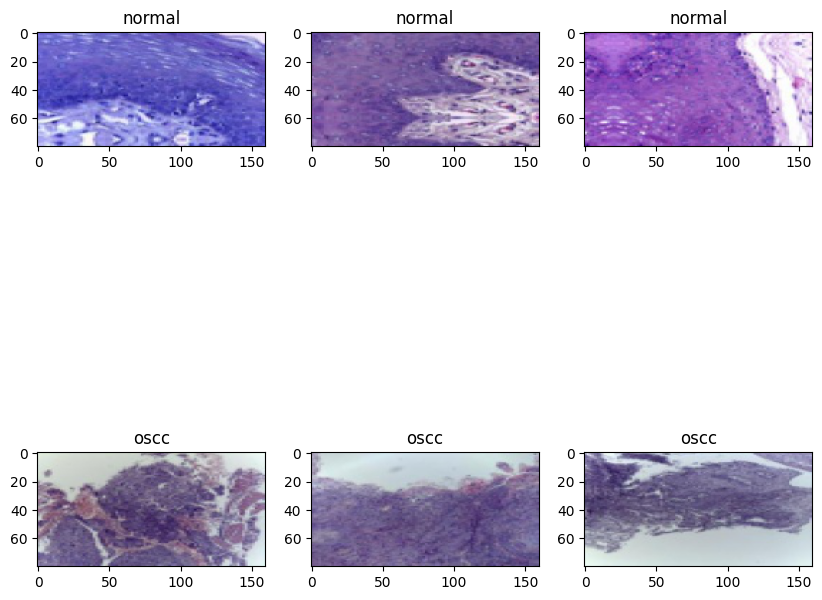

In [6]:
#training data
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(train_normal_path + '/' + random.choice(train_normal_image))
  axes[m].imshow(img)
  axes[m].set_title("normal")
  m=m+1

for i in range(3):
  img = plt.imread(train_oscc_path + '/' + random.choice(train_oscc_image))
  axes[m].imshow(img)
  axes[m].set_title("oscc")
  m=m+1

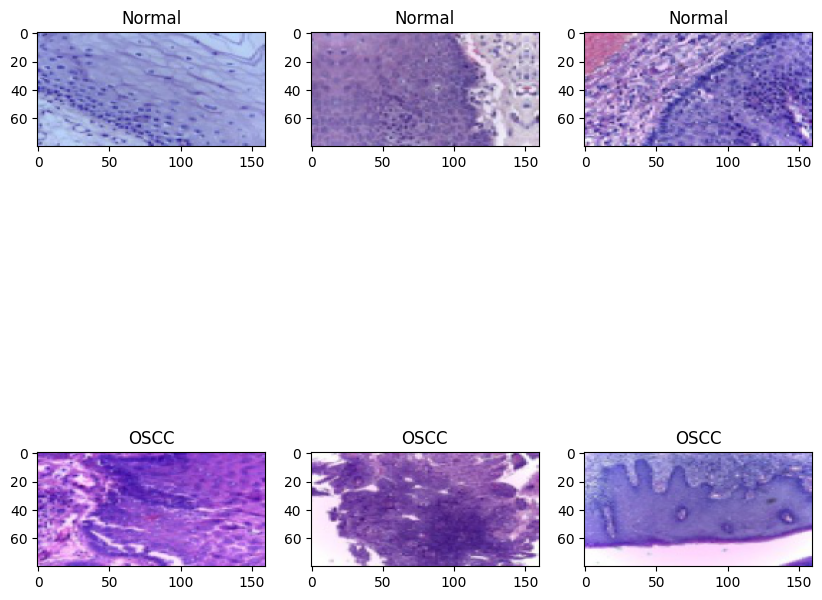

In [7]:
#validation data
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(valid_normal_path + '/' + random.choice(valid_normal_image))
  axes[m].imshow(img)
  axes[m].set_title("Normal")
  m=m+1

for i in range(3):
  img = plt.imread(valid_oscc_path + '/' + random.choice(valid_oscc_image))
  axes[m].imshow(img)
  axes[m].set_title("OSCC")
  m=m+1

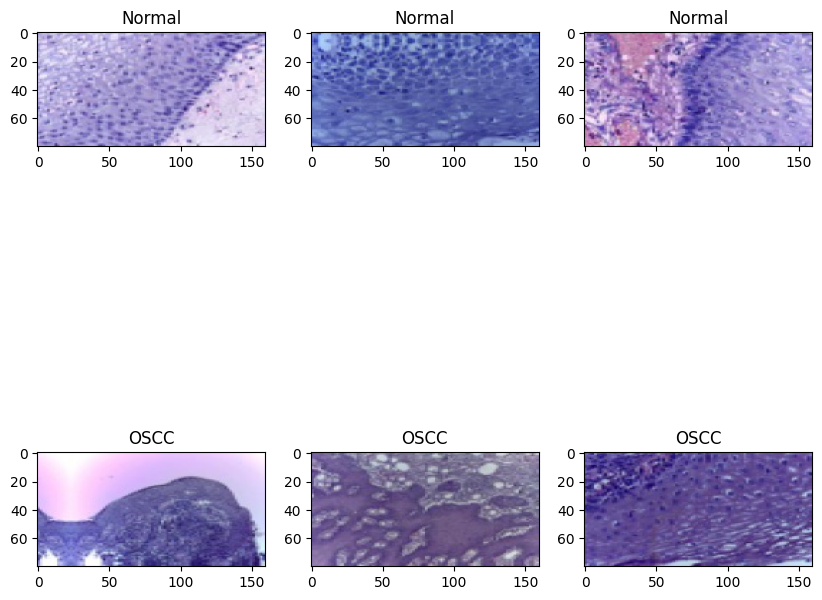

In [8]:
#Test data
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(test_normal_path + '/' + random.choice(test_normal_image))
  axes[m].imshow(img)
  axes[m].set_title("Normal")
  m=m+1

for i in range(3):
  img = plt.imread(test_oscc_path + '/' + random.choice(test_oscc_image))
  axes[m].imshow(img)
  axes[m].set_title("OSCC")
  m=m+1

In [9]:
# Model
model=tf.keras.applications.InceptionResNetV2(weights='imagenet',include_top=False)
# Design new model
x=model.output
x=tf.keras.layers.GlobalMaxPool2D()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
preds = tf.keras.layers.Dense(2, activation = 'softmax')(x)  # This layer will have output. So It will have only one neuron
efficent_model=tf.keras.models.Model(inputs = model.input, outputs = preds)
opt=tf.keras.optimizers.legacy.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
efficent_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])
efficent_model.summary()

219055592/219055592 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                

In [11]:
for i,layer in enumerate(efficent_model.layers):
  print(i,layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed_5b
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 conv2d_12
51 conv2d_14
52 conv2d_17
53 batch_normalization_12
54 batch_normalization_14
55 batch_normalization_17
56 activa

In [13]:
# set layers for training
#layer upto 790 is already trained

for layer in efficent_model.layers[:790]:
  layer.trainable=False
for layer in efficent_model.layers[790:]:
  layer.trainable=True

In [15]:
# prepare Training data
train_generator=ImageDataGenerator()
#train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
train_data=train_generator.flow_from_directory("/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Training",target_size=(150,150),class_mode='categorical', shuffle=True)

Found 4215 images belonging to 2 classes.


In [16]:
# prepare Validation data
valid_generator=ImageDataGenerator()
valid_data=valid_generator.flow_from_directory("/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Validation",target_size=(150,150),class_mode='categorical',shuffle=True)

Found 911 images belonging to 2 classes.


In [17]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data=test_generator.flow_from_directory("/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Testing",target_size=(224,224),class_mode='categorical',shuffle=True)

Found 909 images belonging to 2 classes.


In [18]:
train_data.class_indices

{'NORMAL': 0, 'OSCC': 1}

In [19]:
valid_data.class_indices

{'NORMAL': 0, 'OSCC': 1}

In [20]:
test_data.class_indices

{'NORMAL': 0, 'OSCC': 1}

In [22]:
hist=efficent_model.fit(train_data, epochs=2,validation_data=valid_data)

Epoch 1/2
132/132 [==============================] - 2363s 18s/step - loss: 0.5900 - accuracy: 0.6819 - val_loss: 0.4499 - val_accuracy: 0.7805
Epoch 2/2
132/132 [==============================] - 2264s 17s/step - loss: 0.3377 - accuracy: 0.8539 - val_loss: 0.2774 - val_accuracy: 0.8771


In [23]:
final_model= model.save("/content/drive/MyDrive/Cache/AI - Sem 6/HICD/inceptionresnetv2.h5")